In [1]:
%matplotlib inline

In [12]:
pip install numpy

In [13]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [5]:
# Load in CSV
restaurants = Path('Datafiniti_Fast_Food_Restaurants_May19.csv')
restaurants_DF = pd.read_csv(restaurants)
restaurants_DF.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


In [19]:
# Cleaning Columns
restaurants_DF_clean = restaurants_DF[['name', 'address', 'categories', 'longitude', 'latitude', 'province']]
restaurants_DF_clean.head()


,name,address,categories,longitude,latitude,province
0,Carl's Jr.,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",-104.69699,40.39629,CO
1,Del Taco,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",-108.58689,39.08135,CO
2,Which Wich,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",-108.55411,39.09148,CO
3,Chipotle Mexican Grill,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",-104.77671,39.76369,CO
4,Taco Bell,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",-104.92636,39.74044,CO


In [20]:
# Organize data by category and count of restaurants
categories_word_list = restaurants_DF_clean['categories'].values.tolist()

clean_categories_word_list = []

for category in categories_word_list:
    category = category.lower()
    clean_category = category.replace(',', ' ').replace(' and ', ' ').replace('restaurants', '').replace('restaurant', '').replace('take out', '').replace('fast food', '').replace('carry-out', '').replace('food', ''),
    clean_categories_word_list.append(clean_category)

clean_categories_word_df = pd.Index(clean_categories_word_list)

categories_counts = clean_categories_word_df.value_counts()

categories_counts.head(10)

(  hamburgers hot dogs ,)                                                         182
(,)                                                                               146
(ice cream parlors breakfast  coffeehouses salads hamburgers  sandwich shops,)    140
(     sandwich shops,)                                                            118
(  ,)                                                                             100
(    hamburgers hot dogs ,)                                                        97
( chicken ,)                                                                       93
(pizza     ,)                                                                      93
(   sandwich shops  ,)                                                             86
( mexican breakfast vegetarian  ,)                                                 81
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

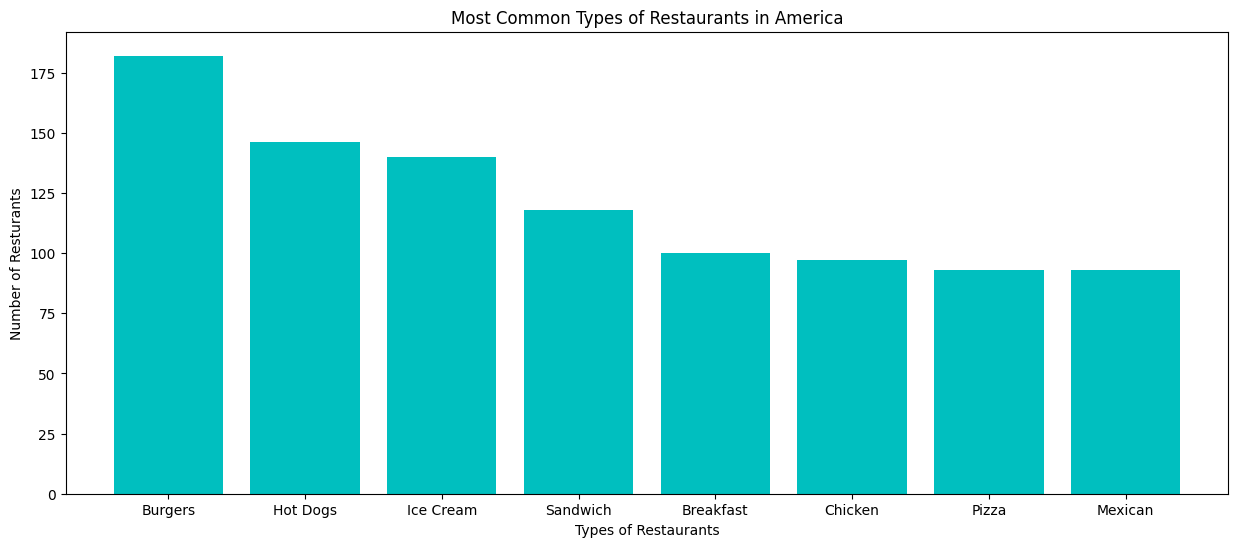

In [21]:
# Creating bar chart for most common fast food restaurants in America
top_categories = ['Burgers', 'Hot Dogs', 'Ice Cream', 'Sandwich', 'Breakfast', 'Chicken', 'Pizza', 'Mexican']
number_of_restaurants = [182, 146, 140, 118, 100, 97, 93, 93]

# Creating the bar chart for Most Common Crimes in L.A. in 2020
x_axis = np.arange(len(number_of_restaurants))
plt.figure(figsize=(15, 6))
plt.bar(x_axis, number_of_restaurants, color="c", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top_categories)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(number_of_restaurants)+10)

plt.title("Most Common Types of Restaurants in America")
plt.xlabel("Types of Restaurants")
plt.ylabel("Number of Resturants")
plt.show

In [24]:
restaurants_DF_clean

,name,address,categories,longitude,latitude,province
0,Carl's Jr.,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",-104.696990,40.396290,CO
1,Del Taco,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",-108.586890,39.081350,CO
2,Which Wich,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",-108.554110,39.091480,CO
3,Chipotle Mexican Grill,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",-104.776710,39.763690,CO
4,Taco Bell,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",-104.926360,39.740440,CO
...,...,...,...,...,...,...
9995,Church's Chicken Of Birmingham,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",-86.951050,33.399574,AL
9996,Luxury Box,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",-78.737541,35.884500,NC
9997,McDonald's,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",-89.543170,44.453180,WI
9998,Pizza Hut,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",-86.607339,36.308262,TN


In [41]:
# Which states have the most number of restaurants
per_state = restaurants_DF_clean['province'].value_counts()
per_state_df = pd.DataFrame(per_state)
per_state_df.head()

# types = per_prov['categories'].value_counts().to_list()
# types_df = pd.DataFrame(types)
# types_df

# keywords = ['Hamburgers', 'Hot Dogs', 'Ice Cream', 'Sandwich', 'Breakfast', 'Chicken', 'Pizza', 'Mexican']

# for keyword in keywords:
#     matches = restaurants_DF_clean[restaurants_DF_clean['categories'].str.contains(keyword, case = False)]
#     print(f"{len(matches)} keyword '{keyword}'")
# states = restaurants_DF_clean['province']
# categories = restaurants_DF_clean['categories']

# states


,province
OH,922
FL,739
CA,727
NC,663
AL,635


<function matplotlib.pyplot.show(close=None, block=None)>

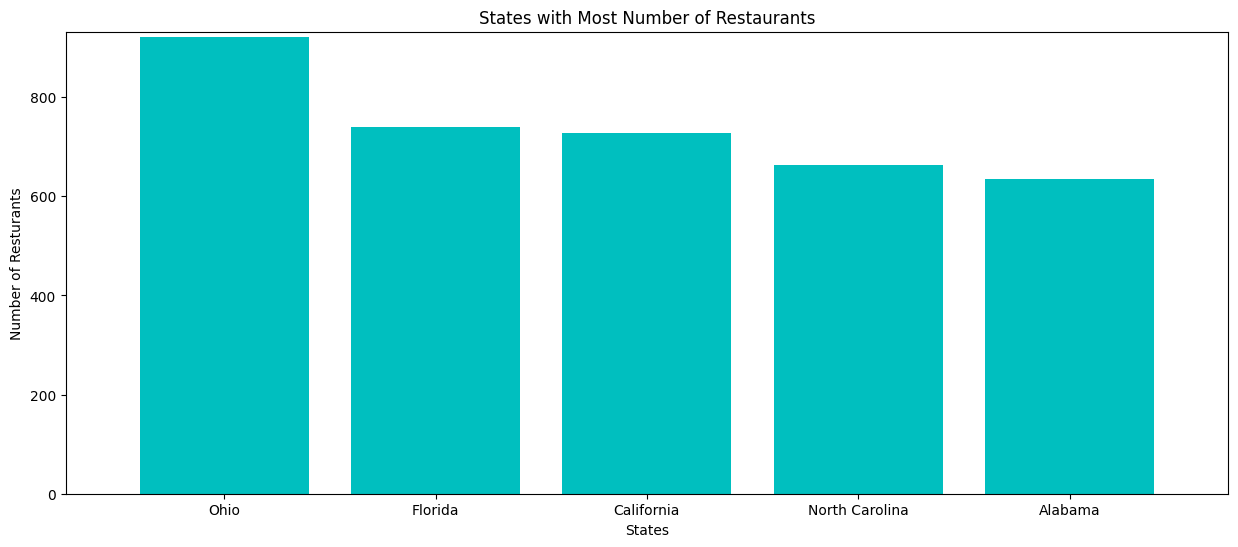

In [42]:
# Creating bar chart for states with most number of restaurants
states = ['Ohio', 'Florida', 'California', 'North Carolina', 'Alabama']
number_of_restaurants = [922, 739, 727, 663, 635]

# Creating the bar chart for Most Common Crimes in L.A. in 2020
x_axis = np.arange(len(number_of_restaurants))
plt.figure(figsize=(15, 6))
plt.bar(x_axis, number_of_restaurants, color="c", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(number_of_restaurants)+10)

plt.title("States with Most Number of Restaurants")
plt.xlabel("States")
plt.ylabel("Number of Resturants")
plt.show

In [44]:
# names
per_rest = restaurants_DF_clean['name'].value_counts()
per_rest_df = pd.DataFrame(per_rest)
per_rest_df.head(10)

,name
McDonald's,765
Subway,667
SUBWAY,543
Taco Bell,529
Pizza Hut,474
Burger King,446
KFC,376
Dairy Queen,251
Wendy's,245
Domino's Pizza,227


<function matplotlib.pyplot.show(close=None, block=None)>

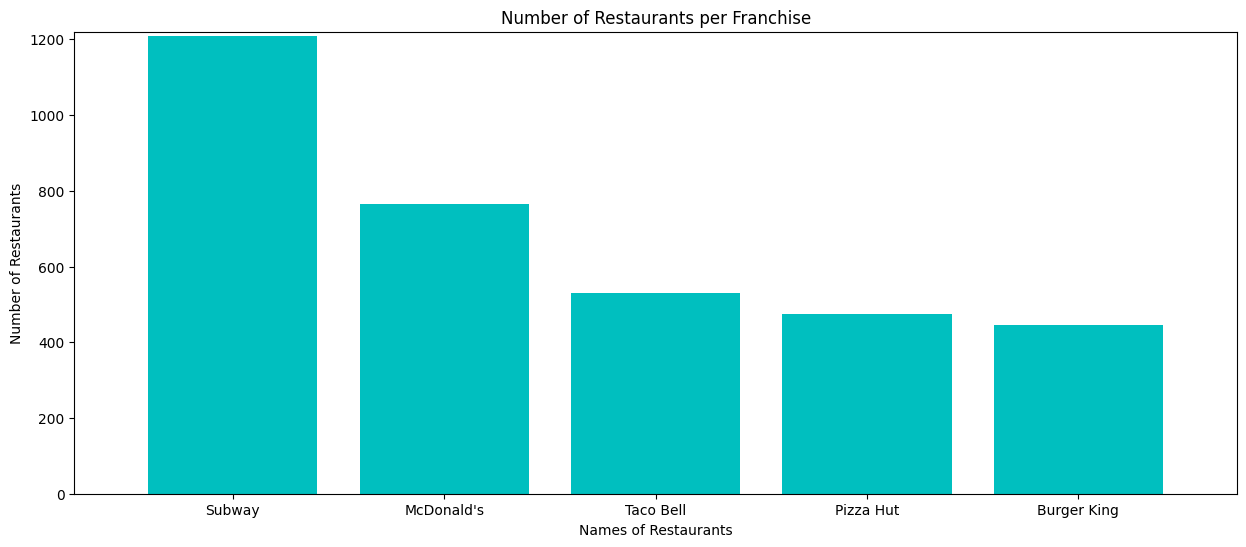

In [51]:
# Declare x and y axis
restname = ["Subway", "McDonald's", "Taco Bell", "Pizza Hut", "Burger King"]
per_rest_numbers = [1210, 765, 529, 474, 446]

# Creating the bar chart for the Number of Restaurants per Franchise
x_axis = np.arange(len(per_rest_numbers))
plt.figure(figsize=(15, 6))
plt.bar(x_axis, per_rest_numbers, color="c", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, restname)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(per_rest_numbers)+10)

plt.title("Number of Restaurants per Franchise")
plt.xlabel("Names of Restaurants")
plt.ylabel("Number of Restaurants")
plt.show
